In [64]:
from hlt import *
import utils
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import numpy as np
%matplotlib inline
import cPickle as pickle
import os

In [63]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

In [223]:
with open('dumps/gameMap80.p','rb') as f:
    myID,gameMap = pickle.load(f)

In [ ]:
def plot_squares(locs,height,width,res=2):
    im = np.zeros((height*res,width*res))
    for loc in locs:
        im[loc.y*res:loc.y*res+res,loc.x*res:loc.x*res+res]=1
    plt.imshow(im)

def plot_quantity_and_dots(locs,gameMap,quantity,res=2,function=None):
    plt.scatter([l.x*res for l in locs],[l.y*res for l in locs])
    plot_quantity(gameMap,quantity,res,function)

In [276]:
def draw_arrow(d,res=16):
    pattern = (0,0,0,1)
    if res!=16:
        raise Exception('Resolution must be 16')
    dot = np.zeros((16,16,4))
    arrow = np.zeros((16,16,4))
    arrow[7:9,2:14]=pattern
    arrow[6:10,12]=pattern
    arrow[5:11,11]=pattern
    arrow[4:12,10]=pattern
    if d == 1:
        return arrow.transpose((1,0,2))[::-1,:]
    elif d == 2:
        return arrow
    elif d == 3:
        return arrow.transpose((1,0,2))
    elif d == 4:
        return arrow[:,::-1]
    elif d == 0:
        return dot
    

In [277]:
arrows = {i:draw_arrow(i) for i in range(5)}

In [278]:
def gen_find_quantity(function,gameMap,quantity):
    def inner(x,y):
        return function(getattr(gameMap.getSite(Location(x,y)),quantity))
    return np.vectorize(inner)

In [279]:
def grad_red(x):
    return (x,0,0,1)

In [280]:
def grad_black(x):
    return (x,x,x,x)

In [281]:
def int_col(x):
    d = {
        0:(0,0,0,1),
        1:(0,1,0,1),
        2:(0,0,1,1),
    }
    return d[x]

In [282]:
def plot_quantity(gameMap,quantity,res=16,function=None,style='heat',alpha=1.,cmap=grad_red):
    if function is None:
        function = lambda x:x
    im = np.zeros((gameMap.height*res,gameMap.width*res,4))
    qmap = {}
    
    for y in range(gameMap.height):
        for x in range(gameMap.width):
            loc = Location(x,y)
            qmap[(y,x)] = float(function(getattr(gameMap.getSite(loc),quantity)))

    qmin,qmax = min(qmap.values()),max(qmap.values())
    
    for y in range(gameMap.height):
        for x in range(gameMap.width):
            if style == 'heat':
                im[y*res:y*res+res,x*res:x*res+res]=cmap(qmap[(y,x)])
            elif style == 'squares':
                qnormed = (qmap[(y,x)]-qmin)/(qmax-qmin)
                square_size = qnormed*(res-2)+1
                start = int((res-square_size)/2)
                end = int((res-square_size)/2 + square_size)
                im[y*res+start:y*res+end,x*res+start:x*res+end]=(1,1,1,1)
            elif style == 'arrows':
                im[y*res:y*res+res,x*res:x*res+res]=arrows[int(qmap[(y,x)])]
                
    plt.imshow(im,alpha=alpha)

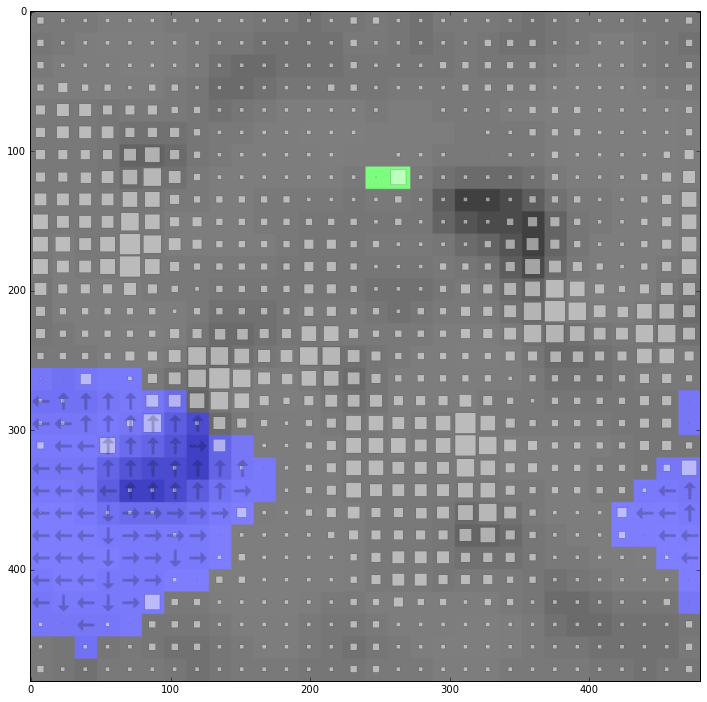

In [286]:
res = 16
figure = plt.figure(figsize=(12,12))
plot_quantity(gameMap,'owner',alpha=1.,res=res,cmap=int_col)
plot_quantity(gameMap,'production',alpha=.5,cmap=grad_black,res=res)
plot_quantity(gameMap,'strength',alpha=0.5,style='squares',res=res)
plot_quantity(gameMap,'frontierDir',alpha=0.2,style='arrows',res=res,function=lambda x: 0. if x is None else x)

In [114]:
all_gameMaps = [f for f in os.listdir('dumps') if f[:7] == 'gameMap']
step_to_gameMap  = {int(x.split('.')[0][7:]):x for x in all_gameMaps}

In [79]:
widgets.Dropdown(options=step_to_gameMap.keys(),description='Step')
